In [558]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np
from sklearn.dummy import DummyClassifier
X = np.array([-1, 1, 1, 1])
y = np.array([0, 1, 1, 1])
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

dummy_clf.predict(X)

dummy_clf.score(X, y)

test_data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
train_data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
sample_data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv")

from sklearn.dummy import DummyClassifier
X = train_data["RecipeName"]
y = train_data["Rating"]
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)

sub = pd.DataFrame(dummy_clf.predict(test_data["RecipeName"]), columns=['Rating'])
sub.index.name = 'ID'
sub.to_csv("submission.csv", encoding='utf-8')

output = pd.read_csv("submission.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


***Exploratory Data Analysis & preprocessing***

In [559]:
train_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [560]:
train_data.tail()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. H...


In [561]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [562]:
train_data.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

In [563]:
train_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [564]:
cols_to_drop = ["ID","CommentID","UserName","RecipeCode","ReplyCount",'UserID']
new_train_data= train_data.drop(cols_to_drop,axis=1)
new_test_data = test_data.drop(cols_to_drop,axis=1)

In [565]:
new_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RecipeNumber,13636.0,3.862438e+01,2.967235e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
UserReputation,13636.0,2.160311e+00,1.008642e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13636.0,1.623713e+09,5.444020e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ThumbsUpCount,13636.0,1.098269e+00,4.166487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13636.0,5.437078e-01,3.265660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13636.0,4.288721e+00,1.544839e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13636.0,1.531279e+02,1.409869e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


In [566]:
cat_cols = new_train_data.select_dtypes(include=['object']).columns
num_cols = new_train_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['RecipeName', 'Recipe_Review'], dtype='object')
Numerical Variables:
['RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']


In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RecipeNumber
Skew :  0.46


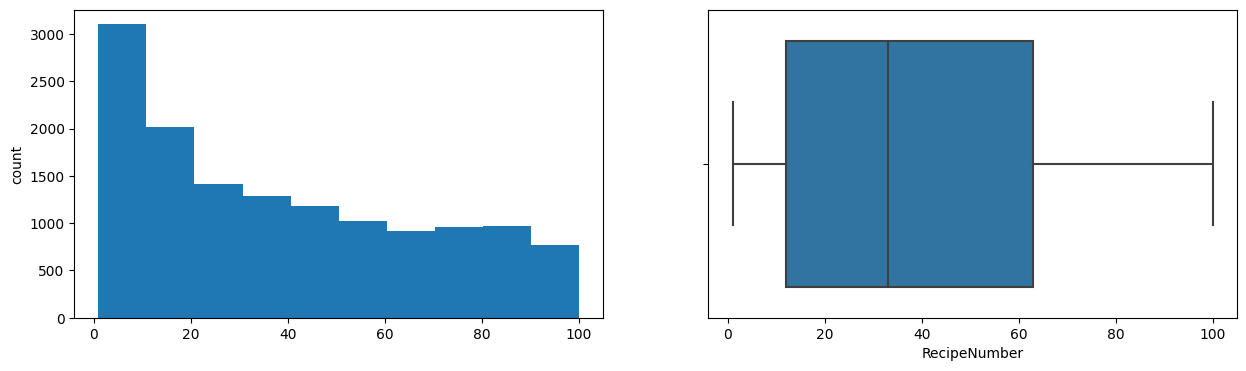

UserReputation
Skew :  33.15


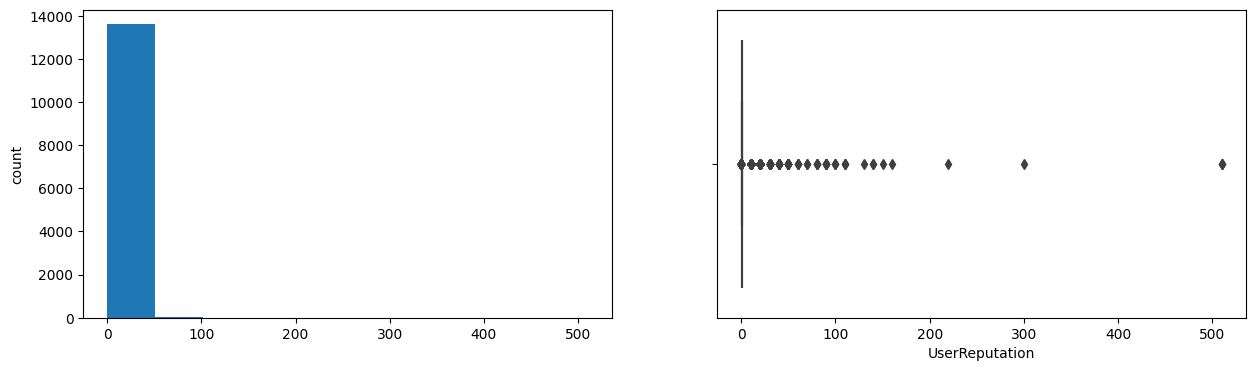

CreationTimestamp
Skew :  5.45


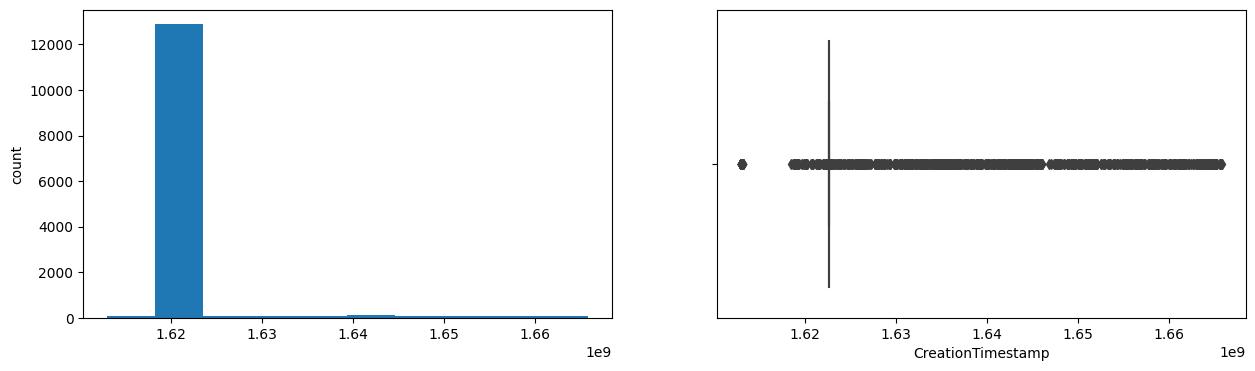

ThumbsUpCount
Skew :  7.89


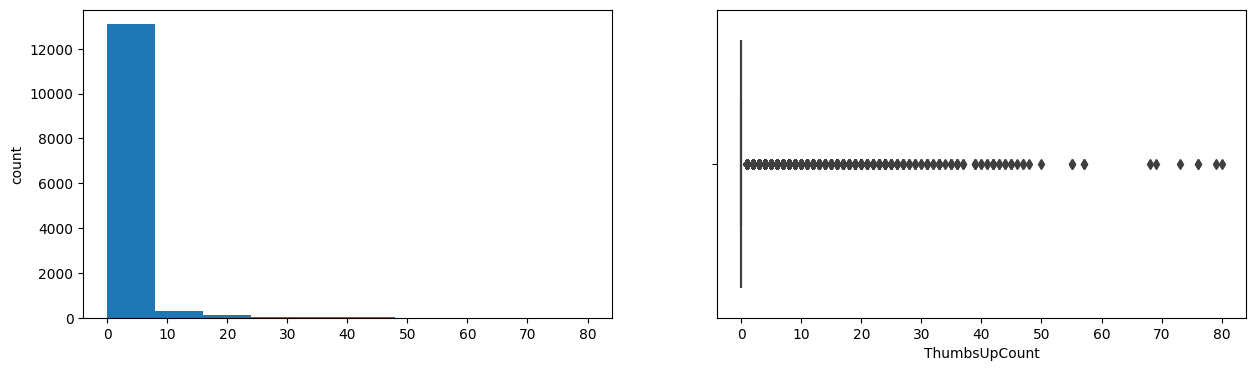

ThumbsDownCount
Skew :  16.66


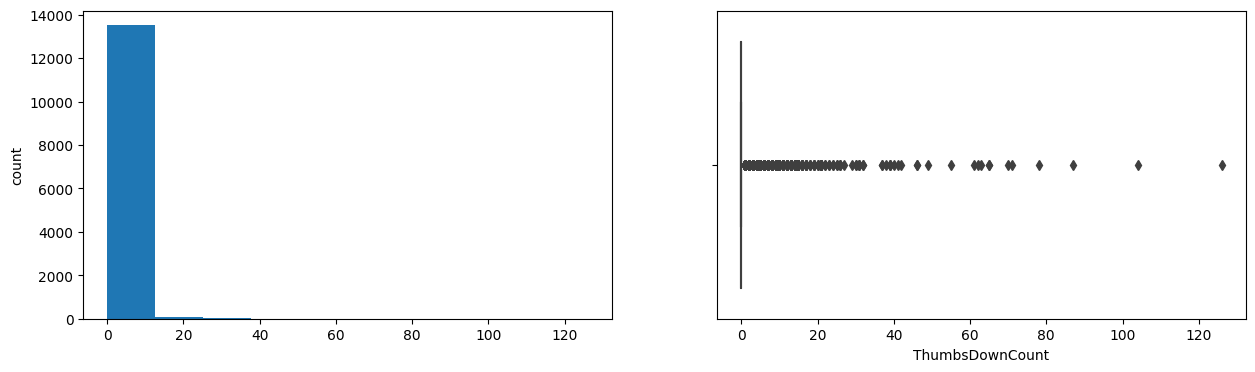

Rating
Skew :  -2.13


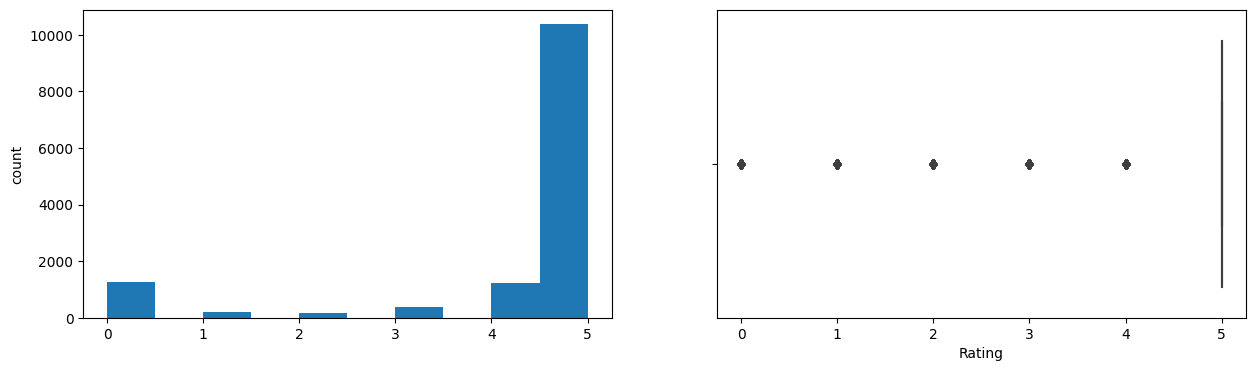

BestScore
Skew :  3.39


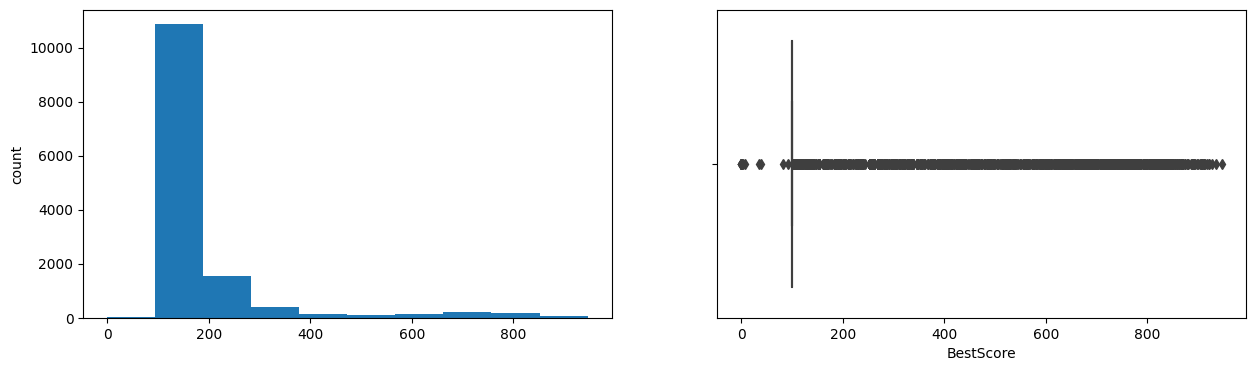

In [568]:
for col in num_cols:
    print(col)
    print('Skew : ',round(new_train_data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    new_train_data[col].hist(grid = False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=new_train_data[col])
    plt.show()

In [569]:
# fig,axes = plt.subplots(3,2, figsize = (18,18))
# fig.suptitle('Bar Plot for all categorical variables in the dataset')
# sns.countplot(ax = axes[0,0],x = 'UserID' , data = new_train_data , color = 'blue', order = new_train_data['UserID'].value_counts().index);
# axes[1][1].tick_params(labelrotation=45);

In [570]:
# # Function for log transformation of the column
# def log_transform(data,col):
#     for colname in col:
#         if (data[colname] == 1.0).all():
#             data[colname + '_log'] = np.log(data[colname]+1)
#         else:
#             data[colname + '_log'] = np.log(data[colname])
#     data.info()


In [571]:
# log_transform(new_train_data,['UserReputation','ThumbsDownCount','ThumbsUpCount'])


/tmp/ipykernel_42/2021741085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data["UserReputation"], axlabel="UserReputation");


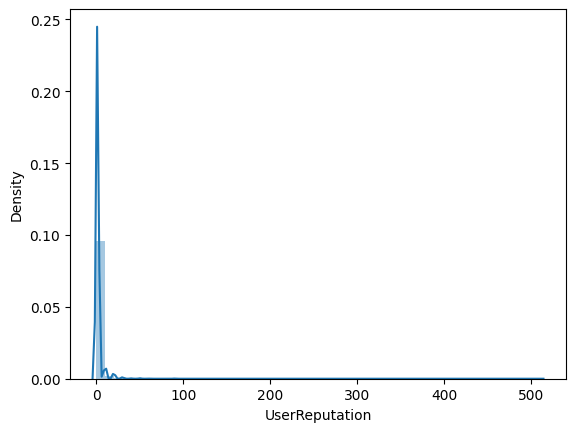

In [572]:
#Log transformation of the feature 'UserReputation'
sns.distplot(new_train_data["UserReputation"], axlabel="UserReputation");

/tmp/ipykernel_42/2456335176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data["ThumbsDownCount"], axlabel="ThumbsDownCount");


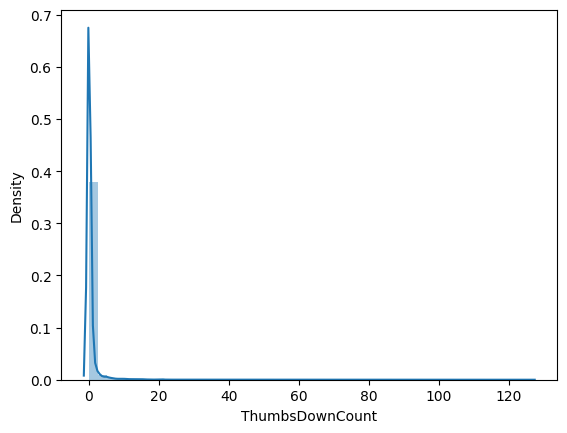

In [573]:
#Log transformation of the feature 'ThumbsDownCount'
sns.distplot(new_train_data["ThumbsDownCount"], axlabel="ThumbsDownCount");

/tmp/ipykernel_42/3492316993.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data["ThumbsUpCount"], axlabel="ThumbsUpCount");


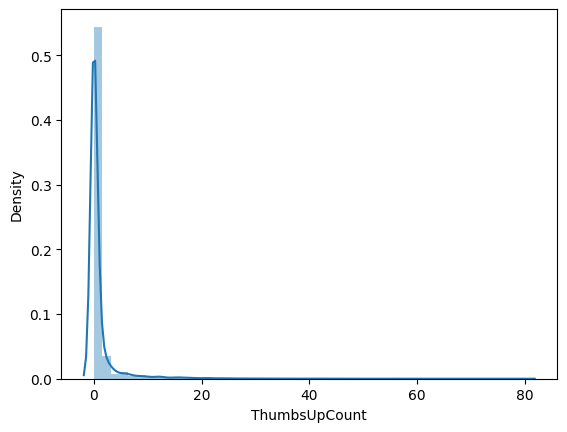

In [574]:
#Log transformation of the feature 'ThumbsUpCount'
sns.distplot(new_train_data["ThumbsUpCount"], axlabel="ThumbsUpCount");

<Figure size 1300x1700 with 0 Axes>

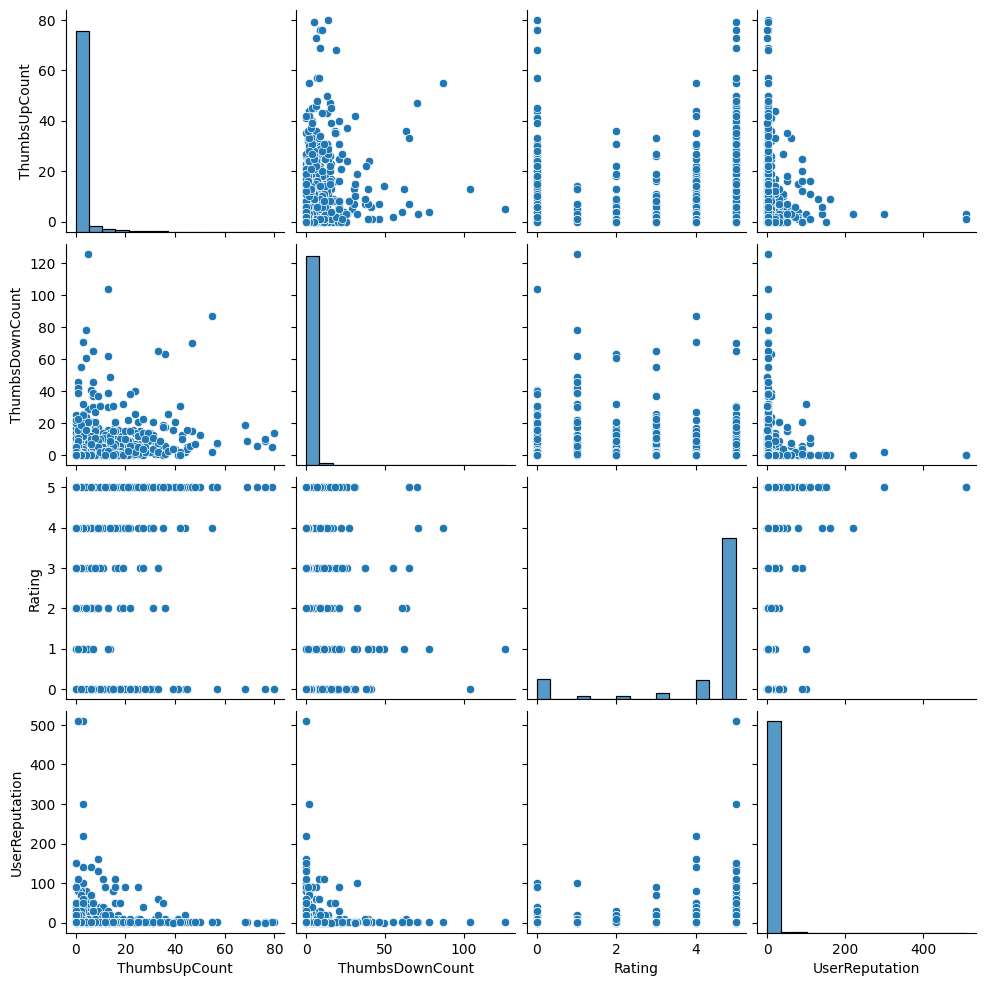

In [575]:
plt.figure(figsize=(13,17))
# Choose a subset of variables if needed
subset_vars = ['ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'UserReputation',]

# Create a pair plot
sns.pairplot(new_train_data[subset_vars])

plt.show()

In [576]:
new_train_data.dropna(inplace=True)
new_train_data.isnull().sum()


RecipeNumber         0
RecipeName           0
UserReputation       0
CreationTimestamp    0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [577]:
new_test_data.isnull().sum()

RecipeNumber         0
RecipeName           0
UserReputation       0
CreationTimestamp    0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [578]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer
cv = CountVectorizer()

# Fit and transform the 'Recipe_Review' column
review_matrix = cv.fit_transform(new_train_data['Recipe_Review'])

# Convert the sparse matrix to a dense matrix
dense_review_matrix = review_matrix.todense()

# Create a DataFrame with the dense matrix
review_df = pd.DataFrame(dense_review_matrix, columns=cv.get_feature_names_out())

# Update the 'Recipe_Review' column in new_train_data
new_train_data['Recipe_Review'] = dense_review_matrix

# Convert the numerical data to float if needed
new_train_data['Recipe_Review'] = new_train_data['Recipe_Review'].astype(float)


In [579]:
# Create a CountVectorizer
cv = CountVectorizer()

# Fit and transform the 'Recipe_Review' column
review_matrix = cv.fit_transform(new_test_data['Recipe_Review'])

# Convert the sparse matrix to a dense matrix
dense_review_matrix = review_matrix.todense()

# Create a DataFrame with the dense matrix
review_df = pd.DataFrame(dense_review_matrix, columns=cv.get_feature_names_out())

# Update the 'Recipe_Review' column in new_train_data
new_test_data['Recipe_Review'] = dense_review_matrix

# Convert the numerical data to float if needed
new_test_data['Recipe_Review'] = new_test_data['Recipe_Review'].astype(float)


In [580]:
new_test_data['Recipe_Review'].head

<bound method NDFrame.head of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4541    0.0
4542    0.0
4543    0.0
4544    0.0
4545    0.0
Name: Recipe_Review, Length: 4546, dtype: float64>

In [581]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer
cv = CountVectorizer()

# Fit and transform the 'Recipe_Review' column
review_matrix = cv.fit_transform(new_train_data['RecipeName'])

# Convert the sparse matrix to a dense matrix
dense_review_matrix = review_matrix.todense()

# Create a DataFrame with the dense matrix
review_df = pd.DataFrame(dense_review_matrix, columns=cv.get_feature_names_out())

# Update the 'Recipe_Review' column in new_train_data
new_train_data['RecipeName'] = dense_review_matrix

# Convert the numerical data to float if needed
new_train_data['RecipeName'] = new_train_data['RecipeName'].astype(float)


In [582]:
# Create a CountVectorizer
cv = CountVectorizer()

# Fit and transform the 'Recipe_Review' column
review_matrix = cv.fit_transform(new_test_data['RecipeName'])

# Convert the sparse matrix to a dense matrix
dense_review_matrix = review_matrix.todense()

# Create a DataFrame with the dense matrix
review_df = pd.DataFrame(dense_review_matrix, columns=cv.get_feature_names_out())

# Update the 'Recipe_Review' column in new_train_data
new_test_data['RecipeName'] = dense_review_matrix

# Convert the numerical data to float if needed
new_test_data['RecipeName'] = new_test_data['RecipeName'].astype(float)


In [583]:
new_test_data['RecipeName'].head

<bound method NDFrame.head of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4541    0.0
4542    0.0
4543    0.0
4544    0.0
4545    0.0
Name: RecipeName, Length: 4546, dtype: float64>

In [584]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# new_train_data['RecipeName'] = label_encoder.fit_transform(new_train_data['RecipeName'])
# new_test_data['RecipeName'] = label_encoder.fit_transform(new_test_data['RecipeName'])

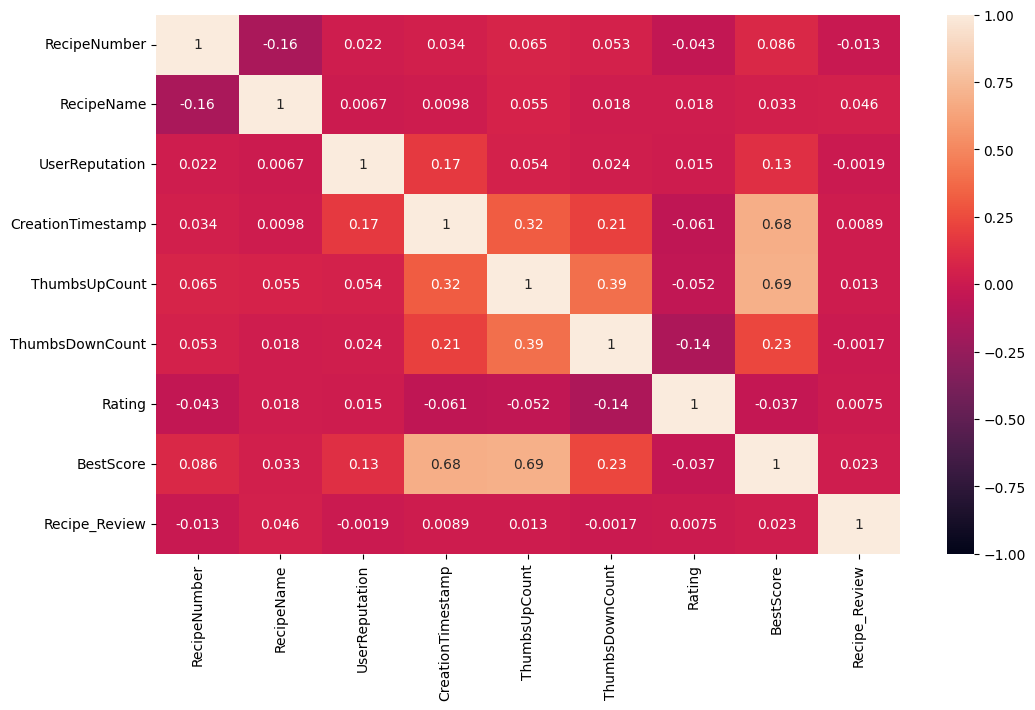

In [585]:
plt.figure(figsize=(12, 7))
sns.heatmap(new_train_data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [586]:
num_cols.remove("Rating")
num_cols.remove('RecipeNumber')

In [587]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_train_data.drop("Rating",axis=1),new_train_data["Rating"],test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9543, 8), (4091, 8), (9543,), (4091,))

In [588]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the numerical features in training data
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

# transform the numerical features in training and test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

new_test_data[num_cols]= scaler.transform(new_test_data[num_cols])

In [589]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [590]:
X.shape,y.shape

((13636,), (13636,))

In [591]:
X.head()

0    Banana Bars with Cream Cheese Frosting
1                          Simple Taco Soup
2                         Cheeseburger Soup
3                 Grilled Huli Huli Chicken
4                          Cauliflower Soup
Name: RecipeName, dtype: object

In [592]:
y.head()

0    5
1    5
2    3
3    5
4    4
Name: Rating, dtype: int64

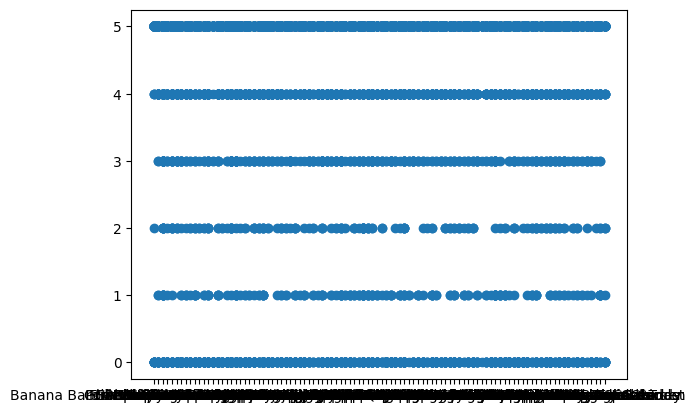

In [593]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [594]:
# import torch
# import matplotlib.pyplot as plt


In [595]:
# # Create device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"
# device

In [596]:
# X_train,y_train = torch.tensor(X_train.values).to(dtype=torch.float32),torch.tensor(y_train.values).to(dtype=torch.float32)
# X_test,y_test = torch.tensor(X_test.values).to(dtype=torch.float32),torch.tensor(y_test.values).to(dtype=torch.float32)

In [597]:
# from torch import nn

# # Build model
# class BlobModel(nn.Module):
#     def __init__(self, input_features, output_features, hidden_units=8):
#         """Initializes all required hyperparameters for a multi-class classification model.

#         Args:
#             input_features (int): Number of input features to the model.
#             out_features (int): Number of output features of the model
#               (how many classes there are).
#             hidden_units (int): Number of hidden units between layers, default 8.
#         """
#         super().__init__()
#         self.linear_layer_stack = nn.Sequential(
#     nn.Linear(in_features=input_features, out_features=hidden_units),
    
#     nn.BatchNorm1d(hidden_units),
#     nn.Linear(in_features=hidden_units, out_features=hidden_units),
    
#     nn.BatchNorm1d(hidden_units),
#     nn.Linear(in_features=hidden_units, out_features=hidden_units),
    
#     nn.BatchNorm1d(hidden_units),
#     nn.Linear(in_features=hidden_units, out_features=hidden_units),
    
#     nn.BatchNorm1d(hidden_units),
#     nn.Linear(in_features=hidden_units, out_features=hidden_units),

#     nn.BatchNorm1d(hidden_units),
#     nn.Linear(in_features=hidden_units, out_features=hidden_units),
#     nn.BatchNorm1d(hidden_units),
#     nn.Linear(in_features=hidden_units, out_features=output_features),
# )

    
#     def forward(self, x):
#         return self.linear_layer_stack(x)

# # Create an instance of BlobModel and send it to the target device
# model_4 = BlobModel(input_features=8, 
#                     output_features=6, 
#                     hidden_units=100).to(device)
# model_4

In [598]:
# # Create loss and optimizer
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model_4.parameters(), 
#                             lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [599]:
# # Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
# model_4(X_train.to(device))[:5]

In [600]:
# # Make prediction logits with model
# y_logits = model_4(X_test.to(device))

# # Perform softmax calculation on logits across dimension 1 to get prediction probabilities
# y_pred_probs = torch.softmax(y_logits, dim=1) 
# print(y_logits[:5])
# print(y_pred_probs[:5])

In [601]:
# # Sum the first sample output of the softmax activation function 
# torch.sum(y_pred_probs[0])

In [602]:
# # Which class does the model think is *most* likely at the index 0 sample?
# print(y_pred_probs[0])
# print(torch.argmax(y_pred_probs[0]))

In [603]:
# y_test.shape,y_pred_probs.shape

In [604]:
# import numpy as np
# from sklearn.metrics import accuracy_score

# y_test_np = y_test.cpu().numpy()
# y_pred_labels = torch.argmax(y_pred_probs, axis=1).cpu().numpy()

# accuracy = accuracy_score(y_test_np, y_pred_labels)
# print("Accuracy:", accuracy)


In [605]:
# print("y_logits dtype:", y_logits.dtype)
# print("y_train dtype:", y_train.dtype)


In [606]:
# y_train = y_train.long()  # Assuming y_train contains integer class labels
# y_test = y_test.long()

In [607]:
# print("Model output shape:", y_logits.shape)
# # Assuming y_logits are raw logits
# y_logits = torch.log_softmax(y_logits, dim=1)


In [608]:
# # Fit the model
# torch.manual_seed(42)

# # Set number of epochs
# epochs = 500

# # Put data to target device
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

# for epoch in range(epochs):
#     ### Training
#     model_4.train()

#     # 1. Forward pass
#     y_logits = model_4(X_train) # model outputs raw logits 
#     y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
#     # print(y_logits)
#     # 2. Calculate loss and accuracy
#     loss = loss_fn(y_logits, y_train) 
#     acc = accuracy_score(y_true=y_train.cpu(),
#                       y_pred=y_pred.cpu())

#     # 3. Optimizer zero grad
#     optimizer.zero_grad()

#     # 4. Loss backwards
#     loss.backward()

#     # 5. Optimizer step
#     optimizer.step()

#     ### Testing
#     model_4.eval()
#     with torch.inference_mode():
#       # 1. Forward pass
#       test_logits = model_4(X_test)
#       test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
#       # 2. Calculate test loss and accuracy
#       test_loss = loss_fn(test_logits, y_test)
#       test_acc = accuracy_score(y_true=y_test.cpu(),
#                              y_pred=test_pred.cpu())

#     # Print out what's happening
#     if epoch % 100 == 0:
#         print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

In [609]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=250,weights="distance",leaf_size=300,p=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)


0.9900450592057005

In [610]:
y_predknn=knn.predict(X_test)
print(classification_report(y_test,y_predknn, zero_division=1))

              precision    recall  f1-score   support

           0       0.20      0.07      0.11       369
           1       0.11      0.03      0.05        61
           2       0.15      0.06      0.09        48
           3       0.16      0.08      0.11       108
           4       0.15      0.05      0.08       396
           5       0.77      0.92      0.83      3109

    accuracy                           0.71      4091
   macro avg       0.25      0.20      0.21      4091
weighted avg       0.62      0.71      0.66      4091



In [611]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(500,), activation="tanh", solver="adam", learning_rate="adaptive", learning_rate_init=0.01,max_iter=500)
# mlp.fit(X_train, y_train)
# mlp.score(X_train, y_train)

In [612]:
# y_predmlp=mlp.predict(X_test)
# print(classification_report(y_test,y_predmlp,zero_division = 1))

In [613]:
# from sklearn.svm import SVC

# svm = SVC(kernel='linear', C=1.0, random_state=42)
# svm.fit(X_train, y_train)
# svm.score(X_train, y_train)

In [614]:
# y_pred_svm= svm.predict(X_test)
# print(classification_report(y_test,y_pred_svm))

In [615]:
# from sklearn.linear_model import SGDClassifier
# sgd_clf = SGDClassifier(alpha=0.1, loss='squared_error', penalty='l1', tol=0.0001)
# sgd_clf.fit(X_train, y_train)
# sgd_clf.score(X_train, y_train)

In [616]:
# sgd_predict=sgd_clf.predict(X_test)
# print(classification_report(y_test,sgd_predict))

In [617]:
# from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier, RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier

# # Define the base models
# estimators = [('rfc',RandomForestClassifier()),('mlp',mlp),('knn',knn),
#               ('gbc', GradientBoostingClassifier())]

# # Define the stacking classifier with the two base models
# stack_clf = StackingClassifier(estimators=estimators, final_estimator=AdaBoostClassifier(n_estimators = 100))

# # Train the stacking classifier on the training data
# stack_clf.fit(X_train, y_train)
# stack_clf.score(X_train, y_train)



In [618]:
# # Make predictions on the test data
# y_pred = stack_clf.predict(X_test)

# # Calculate evaluation metrics
# print(classification_report(y_test, y_pred))


In [619]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = DecisionTreeClassifier(max_depth=100)
clf2 = KNeighborsClassifier(n_neighbors=15)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)],
                        voting='hard', weights=[5, 5])
eclf = eclf.fit(X_train, y_train)
eclf.score(X_train, y_train)

0.9797757518600021

In [620]:
# Make predictions on the test data
y_pred_eclf = eclf.predict(X_test)

# Calculate evaluation metrics
print(classification_report(y_test, y_pred_eclf))


              precision    recall  f1-score   support

           0       0.16      0.20      0.18       369
           1       0.14      0.11      0.13        61
           2       0.08      0.08      0.08        48
           3       0.04      0.06      0.05       108
           4       0.14      0.14      0.14       396
           5       0.78      0.76      0.77      3109

    accuracy                           0.61      4091
   macro avg       0.22      0.22      0.22      4091
weighted avg       0.63      0.61      0.62      4091



In [621]:
from sklearn.ensemble import HistGradientBoostingClassifier
gbdt = HistGradientBoostingClassifier(min_samples_leaf=10,
                                     max_depth=100,
                                    learning_rate=0.001,
                                    max_iter=1000)
gbdt.fit(X_train, y_train)
gbdt.score(X_train,y_train)

0.7686262181703867

In [622]:
y_pred = gbdt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       369
           1       0.35      0.10      0.15        61
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00       108
           4       0.00      0.00      0.00       396
           5       0.76      1.00      0.86      3109

    accuracy                           0.76      4091
   macro avg       0.30      0.18      0.17      4091
weighted avg       0.64      0.76      0.66      4091



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [624]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Define the base models
estimators = [('dtc',DecisionTreeClassifier(max_depth=100)),
              ('gbdt', gbdt)]

# Define the stacking classifier with the two base models
stack_clf = StackingClassifier(estimators=estimators, final_estimator= knn )

# Train the stacking classifier on the training data
stack_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stack_clf.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division = 1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       369
           1       1.00      0.00      0.00        61
           2       1.00      0.00      0.00        48
           3       1.00      0.00      0.00       108
           4       1.00      0.00      0.00       396
           5       0.76      1.00      0.86      3109

    accuracy                           0.76      4091
   macro avg       0.79      0.17      0.14      4091
weighted avg       0.73      0.76      0.66      4091



In [625]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(max_depth=5)
clf1.fit(X_train,y_train)
clf1.score(X_train,y_train)

In [ ]:
# Make predictions on the test data
y_pred = clf1.predict(X_test)

# Calculate evaluation metrics
print(classification_report(y_test, y_pred))


In [ ]:
new_test_data.head()

In [ ]:
y_pred = gbdt.predict(X_test)
print(classification_report(y_test, y_pred))

In [631]:
submission_1 = pd.DataFrame(stack_clf.predict(new_test_data), columns=['Rating'])
submission_1.index.name = 'ID'
# Add 1 to the index to start from 1 instead of 0
submission_1.index += 1
submission_1.to_csv("submission.csv", encoding='utf-8')

output_1 = pd.read_csv("submission.csv")

output_1

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,5


In [633]:
y_pred_clf = stack_clf.predict(new_test_data)
y_pred_clf.shape

(4546,)

In [ ]:
new_test_data.shape

In [ ]:
new_test_data.head()

In [ ]:
new_test_data.iloc[:, 0].shape

In [ ]:
plt.scatter(new_test_data.iloc[:,0],y_pred_clf)

In [ ]:
output_1["Rating"].value_counts()